# 7 Sep 23 - Numerical Integration and More Lagrangians

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Now that we have an idea how to find a wealth of interesting ordinary differential equations using lagrangians, we'll work on building up ways to understand these equations, their solutions and behavior. The issue with this is that **most ODEs do not have analytical solutions**. That means we can't write down nice closed-form solutions for them using trancendental functions. However, don't despair, because that does not mean there is no solution. In fact, the vast majority of non-pathological ODEs one might come across in physics are **garunteed** to have unique solutions (at least for finite time). We can easily calculate these solutions using **numerical integration**. Next week we'll also see how we can characterize the behavior of ODEs even without acess to numerical integration.


[Numerical Integration](https://en.wikipedia.org/wiki/Numerical_integration) is a vast and wide topic with lots of different approaches, important nuances, and difficult problems. Some of the most high profile numerical integration was done by NASA's [human computers](https://education.nationalgeographic.org/resource/women-nasa) -- a now well-known story thanks to the film [Hidden Figures](https://en.wikipedia.org/wiki/Hidden_Figures). Black women formed a core group of these especially talented scientists (including [Mary Jackson](https://en.wikipedia.org/wiki/Mary_Jackson_(engineer)), [Katherine Johnson](https://en.wikipedia.org/wiki/Katherine_Johnson), and [Dorothy Vaughn](https://en.wikipedia.org/wiki/Dorothy_Vaughan)), without whom, John Glenn would not have orbited the Earth in 1962. This is also a very interesting story about the importance of [Historically Black Colleges and Universities](https://en.wikipedia.org/wiki/Historically_black_colleges_and_universities) to American science.



### Harmonic Oscillator

Let's start simple with everyone's favorite differential equation, the simple harmonic oscillator. Recall that we can write the SHO as:

$$
\ddot{x} =  -\omega_0^2
$$

where $\omega_0^2 = \frac{k}{m}$. This equation is 2nd order, but numerical integration techniques only work on 1st order equations. Thankfully they work on any number of potentially coupled 1st order equations. This means that with a quick change of variables, we can write the SHO as a system of 2 first order equations by introducing a new variable $v$ equal to the velocity of the oscillator.

$$
v = \dot{x}
$$

Then the accelleration of the oscillator can be written as:

$$
\dot{v}  = -\omega_0^2
$$

This trick for writing higher order differential equations as first order equations is incredibly common. 

### Setting up to numerically integrate

We need a few things to numerically integrate using `solve_ivp` in python. 

#### 1. Derivatives Function  

First, we need to set up a derivatives function that calculates and returns a list of the values of the first order derivatives given an imput list of current values. These current values represent a location in **phase space**. Phase Space is a space that contains all the information about the state of an ODE. The simple harmonic oscillator has a 2D phase space since its state is totally defined by its position and velocity. 

Here's what our derivatives function looks like for a SHO:

```python
def diffyqs(t,curr_vals, omega2):
    # 2 first-order differential equations for a SHO
    # first 2 arguments are always t and curr_vals, which are followed by any parameters of your ODEs
    x, v = curr_vals   # unpack current values
    
    vdot = -omega2 * x # calculate derivative

    return v,vdot # return derivatives
```

We will pass this function to our solver, which will give us back integrated solutions of our list of derivatives. So since $v = \dot{x}$, our solution will return $x$ first, and $v$.

#### 2. Time Setup

We need to define the time span to solve the ODE for AND the specific times we'd like solution points for. Here it is also convienient to choose a time step $dt$. Here's one way we could do this in python:

```python
tmax = 15
dt = 0.1
tspan = (0,tmax)         # time span
t = np.arange(0,tmax,dt) # specific times to return solutions for
```


#### 3. Parameters and Initial Conditions

Since we're dealing with ODEs, we need to supply an initial condition to be able to solve. The SHO has 2D phase space so we need 2 values for our initial condition. We'll also define parameter value(s) in this step.

```python
omega2 = 2
initial_condition = [1, 0] # pull back 1m, no initial velocity
```

#### 4. Call Integrator

Now all we have left to do is to actually use `solve_ivp` to do the integration. The syntax for how to do this is shown below. We also get the oppourtunity to tell `solve_ivp` exactly what numerical integration method we'd like it to use. For now we can think of the integrator as a magic box and choose `RK45`, or a Runge-Kutta 4th order method. 

```python
solved = solve_ivp(diffyqs,tspan,initial_condition,t_eval = t, args = (omega2,),method="RK45")
```

To access the solution directly, use `solved.y`. `solved.y[0]` is the solved for position array and `solved.y[1]` is the velocity array in this case. Now let's see a full implementation of this below, including some visualization that compares our numerical solution to the analytical solution of the SHO.

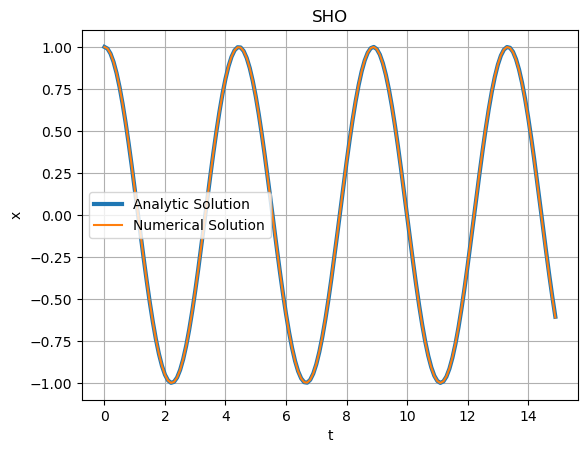

In [2]:
# 1. Derivatives Function
def diffyqs(t,curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v,vdot

# 2. Time Setup
tmax = 15
dt = 0.1
tspan = (0,tmax)
t = np.arange(0,tmax,dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator
solved = solve_ivp(diffyqs,tspan,initial_condition,t_eval = t, args = (omega2,),method="RK45")

# 5. Visualization and Comparision to analytical solution
def analytic_sol(t,omega0,initial_condition):
    x0,v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.plot(t,analytic_sol(t,omega2**0.5,initial_condition),label = "Analytic Solution",linewidth = 3)
plt.plot(t,solved.y[0],label = "Numerical Solution")
plt.title("SHO")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.show()

**&#9989; Do this** 

1. Plot the numerically calculated trajectory in phase space. Use velocity as the y axis and position as the y axis. What shape does it make?
2. Add a drag term equal to $-\beta v$ with $\beta \in [0,1)$ and numerically integrate again. What does this trajectory look like on x vs t plots and phase space plots?

### Back to Paraboloid Paradise

Let's consider the problem we we're working on on Tuesday, Where a particle was constrained to move on the surface $z = r^2$. The EOM we arrived at are complex ($\ddot{r} = \frac{1}{1 + 4r^2}(- 4rv^2 + r\omega^2 -2gr)$ and $\ddot{\theta} = -2\frac{v\omega}{r} $)and it was unclear if those ODEs had solutions at all. Now That we're armed with numerical integration, we can tackle the problem. 

**&#9989; Do this** 

Introduce variables $v$ and $\omega$ to use our trick for reducing $>1$ order differential equations to first order equations to write the equations of motion for this problem as a system of four first order differential equations (shown below).


$$\dot{r} = ?? $$

$$\dot{v} = ??$$ 

 <!-- \frac{1}{1 + 4r^2}(- 8rv^2 + r\omega^2 + 4rv^2 -2gr) -->
 <!-- (1/(1 + 4*r**2)) * (-4*v**2*r + r*omega**2 -2*g*r) -->
$$\dot{\theta} = ?? $$



$$\dot{\omega} = ??$$

<!-- -2\frac{v\omega}{r} -->
<!-- -2*v*omega/r -->

**&#9989; Do this** 

Use these equations to correct the `diffyqs` function in the cell below.


In [3]:
# 1. Derivatives Function
def diffyqs(t,curr_vals, g):

    r, v, theta, omega = curr_vals
    
    vdot = 0

    omegadot = 0

    return v, vdot, omega, omegadot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 40
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0,tmax,dt)

# 3. Parameters and Initial Conditions
g = 9.81
x0 = [2.6,0,0,2] 

# 4. Call Integrator
solved = solve_ivp(diffyqs,(0,tmax),x0,t_eval = t, args = (g,),method="RK45")

**&#9989; Do this** 

1. Make r vs t and theta vs t plots of this trajectory. Can you think of what that trajectory would look like in cartesian coordinates? 2. Run the cell below to see what the trajectory looks like in 3D. How does the true trajectory compare to your prediction?
3. Change the initial condtion to examine the following cases and plot the trajectories in 3d:

    a. Particle starts from rest and is let go

    b. Particle starts at a given height and is given a low speed (less than needed to orbit)

    c. Particle starts at a given height and is given a low speed (more than needed to orbit)

    d. Can you find a flat horizontal circular orbit?



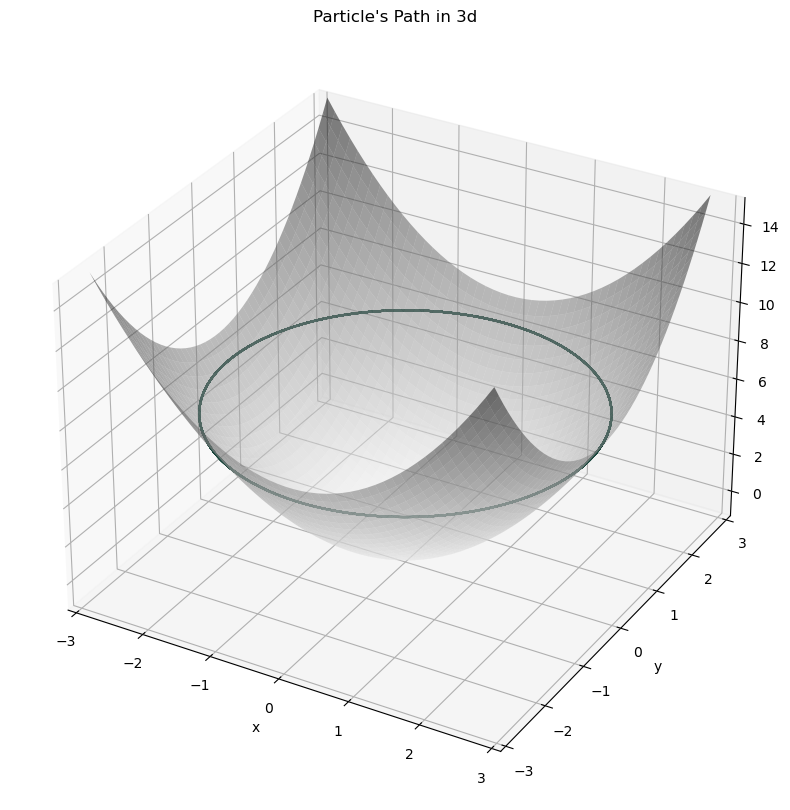

In [4]:
def parabaloid(x,y,alpha=1.):
    # function of a paraboloid in Cartesian coordinates
    return alpha * (x**2 + y**2)

def cylindrical_to_cartesian(r, th):
    # convert back to cartesian coordinates for ease of plotting
    r = np.array(r)
    th = np.array(th)
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y,parabaloid(x, y)

def plot_solution(solved):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = 1
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y,alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2])

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.plot3D(xtraj, ytraj, ztraj, c = "#18453B")
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

plot_solution(solved)

### How Does Numerical Integration actually work?


A computer understands things like updating individual variables with a change. It turns out this process of updating things in steps is the basis for numerical integration. We need a set of update equations. Making those update equations is effectively choosing our integrator.

#### Update equations

The critical part of numerical integration is approximating the change to variables you are investigating. Going back to our differential equations, we can rewrite them as approximate equation, which a computer understands because it involves discrete steps. How we choose to approximate this update indicates which integration routine we've chosen and sets the irreducible error we are stuck with (i.e., $O((\Delta t)^2)$, $O((\Delta t)^3)$, etc.)


We will illustrate three approximations to the slope of these functions:

- **Euler-Cromer (EC)** - definitely the most intuitive of the approaches, where we approximate the slope with two points separated by $\Delta t$ in time. It is quick to write, slow to solve, and requires small steps for accurate results. Even so, it fails to integrate periodic motion well because it doesn't always conserve energy in periodic motion. Turns out it's the best tool to use when you have random noise added to the model though (e.g., $\eta_n(\sigma(t))$). For a first order eqn, $\dot{x}=f(x,t)$,
    
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + \Delta t \left(f(x(t+\dfrac{1}{2}\Delta t), t+\dfrac{1}{2}\Delta t\right)$$

- **Runge-Kutta 2nd order (RK2)** - just a step above Euler-Cromer; it uses three points to approximate the slope giving two measures of the slope (hence, 2nd order). It's not much more complex than Euler-Cromer, but gives an order of magnitude lower error. It's a good starting point for simple systems. For a first order eqn, $\dot{x}=f(x,t)$,

$$k_1 = \Delta t\left(f(x,t)\right),$$
$$k_2 =  \Delta t\left(x+\dfrac{1}{2}k_1, t+\dfrac{1}{2}\Delta t\right),$$
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + k_2$$

- **Runge Kutta 4th order (RK4)** - this is the gold standard. Most researchers start with RK4 on most problems. It uses 5 points to build 4 slope profiles and integrates the system in 4 steps. It is highly adaptable and supported -- it can be modified to take smaller or longer steps depending on the specific nature of the problem at the time. I mean that it can change step size in the middle of its work; including within the step it is taking presently. For a first order eqn, $\dot{x}=f(x,t)$,

$$k_1 = \Delta t\left(f(x,t)\right),$$
$$k_2 =  \Delta t\left(x+\dfrac{1}{2}k_1, t+\dfrac{1}{2}\Delta t\right),$$
$$k_3 =  \Delta t\left(x+\dfrac{1}{2}k_2, t+\dfrac{1}{2}\Delta t\right),$$
$$k_4 =  \Delta t\left(x+k_3, t+\Delta t\right),$$
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + \dfrac{1}{6}\left(k_1 + 2k_2 +2k_3 +k_4\right)$$

We don't expect you memorize these approaches or to derive them, but to understand how they work and what their limitations are.


## Numerically analyzing this system

### Analysis of the Energy

We know that this is a system that should conserve energy. There's no dissipation and there's only conservatives forces acting to change the speed of the object. The contact forces only change direction, so the system is "conservative".

Let's compute the energy:

$$T = \dfrac{m}{2}\left(\dot{r}^2 + r^2\dot{\theta}^2 + \dot{z}^2\right) = (\dot{r}^2 + r^2\dot{\theta}^2 + 4r^2\dot{r}^2)$$

$$U = mgz = mgr^2$$

We have all these quantities except $m$. Let's divide it out for just set it to 1. The code below computes and plots the energies.

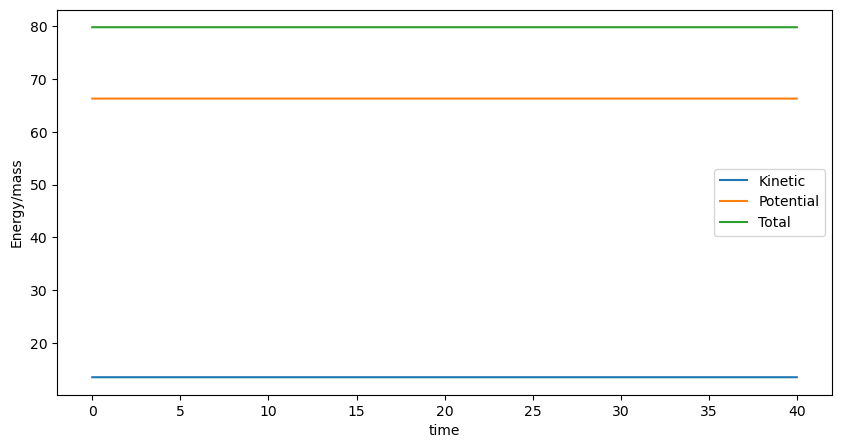

In [10]:
# Unpack solution in a convienient way
r,v,theta,omega = solved.y

## Kinetic
T = 0.5*(v**2 + r**2 * omega**2 + 4 * r**2 * v**2)

## Potetial
U = g*r**2

## Total
E=T+U

ax = plt.figure(figsize=(10,5))
plt.plot(t, T, label='Kinetic')
plt.plot(t, U, label='Potential')
plt.plot(t, E, label='Total')
plt.legend()
plt.xlabel('time')
plt.ylabel('Energy/mass')
plt.show()

## Angular Momentum Analysis

We argued that the equation 
$$\dfrac{d}{dt}\left(mr^2\dot{\theta}\right) = 0$$
was a statement of conservation of the z-component of angular momentum.

Recall that angular momentum is a vector quantity and can be conserved in total, but also a given component might be conserved while others are not. Let's compute the angular momentum and see what the deal is. This will involve taken cross products in cylindrical coordinates (which also obey the right hand rule!).

Starting with the classical relationship:

$$\dfrac{\mathbf{L}}{m} = \mathbf{r} \times \mathbf{v}$$

We can write down position and velocity vectors in general:

$$\mathbf{r} = r\hat{r} + z\hat{z}$$
$$\mathbf{v} = v_r\hat{r} + v_{\theta}\hat{\theta} + v_z \hat{z}$$

Let's take the cross product:

$$\mathbf{r} \times \mathbf{v} = \left(r\hat{r} + z\hat{z}\right) \times
\left( v_r\hat{r} + v_{\theta}\hat{\theta} + v_z \hat{z} \right)$$

Which is

$$\dfrac{\mathbf{L}}{m} = \mathbf{r} \times \mathbf{v} = -(z v_{\theta})\hat{r} + (z v_r -r v_z)\hat{\theta} + rv_{\theta}\hat{z}$$

Or:

$$\dfrac{L_r}{m} = -(z v_{\theta})$$

$$\dfrac{L_{\theta}}{m} = (z v_r -r v_z)$$

$$\dfrac{L_z}{m} = rv_{\theta}$$

Yep, $L_z$ just pops out:

$$\dfrac{L_z}{m} = rv_{\theta} = r^2\dot{\theta}$$

$$L_z = m r^2\dot{\theta}$$

A good physics question is 'why?'

Let's plot it

**&#9989; Do this** 

Calculate and plot $L_z /m$ vs $t$.

In [13]:
## your code here

**&#9989; Do this** 

Calculate $L_r /m$, $L_\theta / m$, and $L_{tot} /m$. Plot these against time alongside $L_z/m$, all on the same plot. What do you observe?

In [1]:
# your code here

## Constraints Revisited - Lagrange Multipliers

Thus far we've been treating constrained motion problems by including the constraint information in the generalized coordinates themselves, but there is a more general approach for these kinds of problems - Lagrange Multipliers. Toward finding a modified Euler-Lagrange equation that deals with these, we can start by looking at a way that one might arrive at the original Euler-Lagrange equation.


We start By defining $L = T-V$ and we define the action of our system by:

$$
S = \int_{t_1}^{t_2}(\mathbf{q},\dot{\mathbf{q}},t) dt
$$

Via the principle of least action we know that $\delta S = 0$ for our ideal path since the $S$ integral is stationary along that path. If we nudge our generalized coordinates a bit:


$$
\mathbf{q} \rightarrow \mathbf{q} + \delta \mathbf{q} 
$$

This lets us define a small change in the lagrangian:

$$
\delta L = \frac{\partial L}{\partial \mathbf{q}} \cdot \delta \mathbf{q} + \frac{\partial L}{\partial \dot{\mathbf{q}}}\cdot \delta \dot{\mathbf{q}}
$$

Which in-turn gives us a small change in the action:

$$
\delta S = \int_{t_1}^{t_2} \left(  \frac{\partial L}{\partial \mathbf{q}} \cdot \delta \mathbf{q} + \frac{\partial L}{\partial \dot{\mathbf{q}}}\cdot \delta \dot{\mathbf{q}} \right) dt 
$$

Integrating by parts gives:
$$
= \int_{t_1}^{t_2} \left(\frac{\partial L}{\partial \mathbf{q}}\cdot  \delta \mathbf{q} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\mathbf{q}}} \right)\cdot\delta\mathbf{q}  \right)dt + \left[\frac{\partial L}{\partial \dot{\mathbf{q}}}\cdot \delta \mathbf{q}\right]_{t_1}^{t_2}
= \int_{t_1}^{t_2} \left(\frac{\partial L}{\partial \mathbf{q}} - \frac{d}{dt}\left(\frac{\partial L}{\partial \mathbf{q}}\right) \right)\cdot \delta\mathbf{q} dt
$$

Which finally lets us argue:
$$
\sum_{i=0}^n \left(\frac{\partial L}{\partial q_i} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right)  \right) \delta q_i = 0
$$

Since our generalized coordinates are independent, this gives us the original Euler-Lagrange equation:

$$
\frac{\partial L}{\partial q_i} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right) = 0
$$

But let's say our coordinates are constrained by some $f(\mathbf{q},t) = 0$. Noting that $\delta f = \frac{\partial f}{\partial \mathbf{q}}\cdot \delta \mathbf{q} = 0$, we can modify the above equation to read:


$$
\sum_{i=0}^n \left(\frac{\partial L}{\partial q_i} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right)  + \lambda \frac{\partial f}{\partial q_i}\right) \delta q_i = 0
$$

Where we've introduced $\lambda$, a **lagrange multiplier**. This gives us a new modified version of the Euler-Lagrange Equation:


$$
\frac{\partial L}{\partial q_i} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right)  + \lambda \frac{\partial f}{\partial q_i} = 0
$$


The beautiful thing about this equation is that $\lambda$ itself often will take the form of the constraint force itself (though this is nuanced and depends on the system at hand). So if you do want to know what your constraint forces are - for example say you're designing a roller coaster and you need to know the forces that passengers experience for safety reasons - you can still obtain them via the lagrangian approach, which still lets you bypass the Newtonian framework.

**&#9989; Do this** 

Use the modified Euler-Lagrange equation with generalized coordinates $\mathbf{q} = (r,\theta, z)$ and constraint equation $f = r^2 - z = 0$ to find the equations of motion for the paraboloid problem. Also solve for $\lambda$. What is the physical meaning of this lagrange multiplier?

Note: The procedure here is a bit different now, since you impose the constraint **after** iterating the modified Euler-Lagrange equation 3 times. Then you'll have a system of equations to solve for $\ddot{r}$ and $\lambda$.